In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import ridge_regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_excel('realestate.xlsx')

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df = df.rename(index=str, columns = {'X1 transaction date':'X1','X2 house age':'X2',
       'X3 distance to the nearest MRT station':'X3',
       'X4 number of convenience stores':'X4', 'X5 latitude':'X5', 'X6 longitude':'X6'})
temp_columns = list(df.columns)
temp_columns.remove('Y house price of unit area')
temp_columns.remove('No')
X = df[temp_columns]
X = preprocessing.normalize(X)
y = df['Y house price of unit area']
#y = preprocessing.normalize(np.array([y]))
y = np.array(y)

In [5]:
temp_columns

['X1', 'X2', 'X3', 'X4', 'X5', 'X6']

### 5 (a)

In [6]:
kf = KFold(n_splits=5, shuffle=False)
kf_valid = KFold(n_splits=4,shuffle = False)

In [7]:
print("Ridge Regression - 5 Fold CV to estimate regularisation coefficient\n")
print("*"*65)
penalty = np.logspace(-10, -2, 100)
k_fold = {i:{j:0 for j in range(1,5)} for i in range(1,6)}
valid_overall = []
fold_count = 0
for train_index, test_index in kf.split(X):
    fold_count+=1
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    penalty_wise = []
    for i in range(len(penalty)):
        validation = []
        for valid_train, valid_test in kf_valid.split(X_train):
            x_valid_train = X_train[valid_train]
            y_valid_train = y_train[valid_train]
            x_valid_test = X_train[valid_test]
            y_valid_test = y_train[valid_test]
            ridge = Ridge(alpha = penalty[i])
            ridge.fit(x_valid_train,y_valid_train)
            predicted = ridge.predict(x_valid_test)
            valid_error = np.sqrt(mean_squared_error(predicted,y_valid_test))
            validation.append(valid_error)
        penalty_wise.append(np.array(validation).mean())
    #print(penalty_wise)
    best_regulariser = penalty[np.argmin(np.array(penalty_wise))]
    print("The best regularising coefficient has value",best_regulariser)
    print("The validation error (Mean RMSE) on fold ",fold_count, "is ",penalty_wise[np.argmin(np.array(penalty_wise))])
    ridge = Ridge(alpha = best_regulariser)
    ridge.fit(X_train,y_train)
    train_error = np.sqrt(mean_squared_error(ridge.predict(X_train),y_train))
    print("The Error on training set for fold ",fold_count," is ",train_error)
    test_error = np.sqrt(mean_squared_error(ridge.predict(X_test),y_test))
    print("The Error on test set for fold ",fold_count, "is ", test_error)
    valid_overall.append(test_error)

print("*"*65,"\n")
print("The overall error on test is,",np.array(valid_overall).mean())
print("Regularisation Coefficient",best_regulariser," is the best for this problem")

Ridge Regression - 5 Fold CV to estimate regularisation coefficient

*****************************************************************
The best regularising coefficient has value 3.6783797718286343e-10
The validation error (Mean RMSE) on fold  1 is  8.346598583131726
The Error on training set for fold  1  is  8.367107300738159
The Error on test set for fold  1 is  6.067215877837693
The best regularising coefficient has value 4.4306214575838866e-10
The validation error (Mean RMSE) on fold  2 is  7.758246903047727
The Error on training set for fold  2  is  7.815727852895697
The Error on test set for fold  2 is  8.511212929521657
The best regularising coefficient has value 5.336699231206302e-10
The validation error (Mean RMSE) on fold  3 is  8.232171082517533
The Error on training set for fold  3  is  8.272826875088217
The Error on test set for fold  3 is  6.577224265532432
The best regularising coefficient has value 3.0538555088334126e-10
The validation error (Mean RMSE) on fold  4 is  7

### 5(b)

In [8]:
print("Lasso Regression - 5 Fold CV to estimate regularisation coefficient\n")
print("*"*65)
penalty = np.logspace(-10, -2, 100)
k_fold = {i:{j:0 for j in range(1,5)} for i in range(1,6)}
valid_overall = []
fold_count = 0
for train_index, test_index in kf.split(X):
    fold_count+=1
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    penalty_wise = []
    for i in range(len(penalty)):
        validation = []
        for valid_train, valid_test in kf_valid.split(X_train):
            x_valid_train = X_train[valid_train]
            y_valid_train = y_train[valid_train]
            x_valid_test = X_train[valid_test]
            y_valid_test = y_train[valid_test]
            lasso = Lasso(alpha = penalty[i],max_iter = 10000)
            lasso.fit(x_valid_train,y_valid_train)
            predicted = lasso.predict(x_valid_test)
            valid_error = np.sqrt(mean_squared_error(predicted,y_valid_test))
            validation.append(valid_error)
        penalty_wise.append(np.array(validation).mean())
    #print(penalty_wise)
    best_regulariser = penalty[np.argmin(np.array(penalty_wise))]
    print("The best regularising coefficient has value",best_regulariser)
    print("The validation error (Mean RMSE) on fold ",fold_count, "is ",penalty_wise[np.argmin(np.array(penalty_wise))])
    lasso = Lasso(alpha = best_regulariser,max_iter=10000)
    lasso.fit(X_train,y_train)
    train_error = np.sqrt(mean_squared_error(lasso.predict(X_train),y_train))
    print("The Error on training set for fold ",fold_count," is ",train_error)
    test_error = np.sqrt(mean_squared_error(lasso.predict(X_test),y_test))
    print("The Error on test set for fold ",fold_count, "is ", test_error)
    valid_overall.append(test_error)
    print("\n")
print("*"*65,"\n")
print("The overall error on test is,",np.array(valid_overall).mean())
print("Regularisation Coefficient",best_regulariser," is the best for this problem")

Lasso Regression - 5 Fold CV to estimate regularisation coefficient

*****************************************************************


/home/deepak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


The best regularising coefficient has value 1e-10
The validation error (Mean RMSE) on fold  1 is  8.793841153696986
The Error on training set for fold  1  is  8.888373954660429
The Error on test set for fold  1 is  6.7886454267239325


The best regularising coefficient has value 1e-10
The validation error (Mean RMSE) on fold  2 is  8.305470453716222
The Error on training set for fold  2  is  8.421617767376004
The Error on test set for fold  2 is  8.840053005915944


The best regularising coefficient has value 1e-10
The validation error (Mean RMSE) on fold  3 is  8.663041778424276
The Error on training set for fold  3  is  8.777721360654592
The Error on test set for fold  3 is  7.351247656213983


The best regularising coefficient has value 1e-10
The validation error (Mean RMSE) on fold  4 is  7.644442754709454
The Error on training set for fold  4  is  7.602224702006101
The Error on test set for fold  4 is  11.444069749812137


The best regularising coefficient has value 1e-10
The vali

### 5(c)

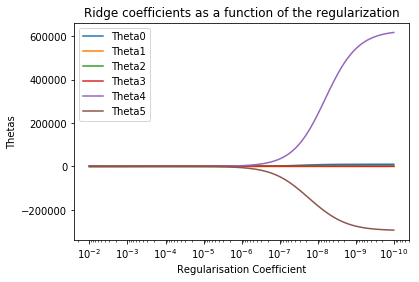

***************************************************************** 



/home/deepak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


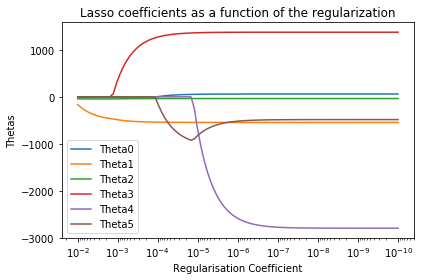

In [11]:
penalty = np.logspace(-10, -2, 100)
coefficients = []
intercept = []
for i in penalty:
    ridge = Ridge(alpha=i)
    ridge.fit(X, y)
    coefficients.append(ridge.coef_)
    intercept.append(ridge.intercept_)
ax = plt.gca()

#ax.plot(penalty,np.array(intercept),label='Theta0')
ax.plot(penalty,np.array(coefficients)[:,0],label='Theta0')
ax.plot(penalty,np.array(coefficients)[:,1],label='Theta1')
ax.plot(penalty,np.array(coefficients)[:,2],label='Theta2')
ax.plot(penalty,np.array(coefficients)[:,3],label='Theta3')
ax.plot(penalty,np.array(coefficients)[:,4],label='Theta4')
ax.plot(penalty,np.array(coefficients)[:,5],label='Theta5')
#ax.plot(penalty,np.array(coefficients)[:,6],label='Theta6')
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('Regularisation Coefficient')
plt.ylabel('Thetas')
plt.legend()
plt.title('Ridge coefficients as a function of the regularization')
plt.show()
print("*"*65,"\n")

penalty = np.logspace(-10, -2, 100)
coefficients = []
intercept = []
for i in penalty:
    lasso = Lasso(alpha=i)
    lasso.fit(X, y)
    coefficients.append(lasso.coef_)
    intercept.append(lasso.intercept_)
ax = plt.gca()

#ax.plot(penalty,np.array(intercept),label='Theta0')
ax.plot(penalty,np.array(coefficients)[:,0],label='Theta0')
ax.plot(penalty,np.array(coefficients)[:,1],label='Theta1')
ax.plot(penalty,np.array(coefficients)[:,2],label='Theta2')
ax.plot(penalty,np.array(coefficients)[:,3],label='Theta3')
ax.plot(penalty,np.array(coefficients)[:,4],label='Theta4')
ax.plot(penalty,np.array(coefficients)[:,5],label='Theta5')
#ax.plot(penalty,np.array(coefficients)[:,6],label='Theta6')
ax.set_xscale('log')

ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('Regularisation Coefficient')
plt.ylabel('Thetas')
plt.legend()
plt.title('Lasso coefficients as a function of the regularization')
plt.tight_layout()
plt.show()


As we can see, L1 regularisation in general causes more sparsity in the solution as it forces a lot many parameters to be close to zero (note the scale), in comparison to the L2 regularisation.

### 5(d)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, test_size=0.2)
penalty = np.logspace(-10, 0, 100)
l1_test_error = []
l1_train_error = []
l2_train_error = []
l2_test_error  =[]
for i in range(len(penalty)):
    ridge = Ridge(alpha = penalty[i])
    lasso = Lasso(alpha = penalty[i])
    ridge.fit(X_train,y_train)
    lasso.fit(X_train,y_train)
    predicted_l2 = ridge.predict(X_test)
    predicted_l1 = lasso.predict(X_test)
    l2_test_error.append(np.sqrt(mean_squared_error(predicted_l2,y_test)))
    l2_train_error.append(np.sqrt(mean_squared_error(ridge.predict(X_train),y_train)))
    l1_test_error.append(np.sqrt(mean_squared_error(predicted_l1,y_test)))
    l1_train_error.append(np.sqrt(mean_squared_error(lasso.predict(X_train),y_train)))

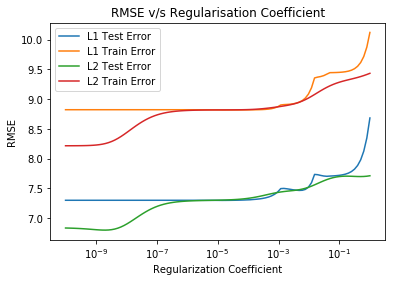

In [13]:
plt.xscale('log')
plt.xlabel('Regularization Coefficient')
plt.ylabel('RMSE')
plt.title('RMSE v/s Regularisation Coefficient')
plt.plot(penalty,l1_test_error,label='L1 Test Error')
plt.plot(penalty,l1_train_error,label = 'L1 Train Error')
plt.plot(penalty,l2_test_error,label = 'L2 Test Error')
plt.plot(penalty, l2_train_error,label = 'L2 Train Error')
plt.legend()